# Determine Pricing

### Goal: 
- Evaluate whether a pricing test running on the site has been successful. 

### Summary of Findings:

1. Should the company sell its software for \\$39 or \\$59?
    - The company should sell its software for \\$59 which will increase revenue per person by ~18 cents.


2. The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?
    - The greatest improvement in revenue/person in the new pricing model comes from friend referral and google ads. Thus, the company should 1) encourage referrals, for example, giving a coupon for each referral and 2) increase google ads.
    - The new pricing model brings in most revenue from users of Apple products (iOS and mac) and mobile users, thus, the company should target this customer segment and increase user experience for users on apple products and for mobile users. 
    

3. The VP of Product feels that the test has been running for too long and she should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days would you have stopped the test? Please, explain why.
    - We need to run the test long enough so we'll have at least 41 users in each control and treatment group to have an 80% chance of identifying a 20% change in conversion rate. This minimum threshold number of users will vary depending on our choice for the 1) the minimum detectable effect (the minimum change in conversion rate between control group and test group if the alternative hypothesis is true and) 2) power (the probability of rejecting the null hypothesis when the null hypothesis is false (typically set at 80%)).

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
%matplotlib inline

In [2]:
#Load the tables
test_results = pd.read_csv('../test_results.csv', low_memory=False)
user_table = pd.read_csv('../user_table.csv', low_memory=False)

In [3]:
test_results.head()

Unnamed: 0  user_id            timestamp          source  device  \
0           0   604839  2015-05-08 03:38:34    ads_facebook  mobile   
1           1   624057  2015-05-10 21:08:46      seo-google  mobile   
2           2   317970  2015-04-04 15:01:23        ads-bing  mobile   
3           3   685636  2015-05-07 07:26:01  direct_traffic  mobile   
4           4   820854  2015-05-24 11:04:40    ads_facebook     web   

  operative_system  test  price  converted  
0              iOS     0   39.0          0  
1          android     0   39.0          0  
2          android     0   39.0          0  
3              iOS     1   59.0          0  
4              mac     0   39.0          0

In [4]:
user_table.head()

user_id         city country    lat    long
0   510335      Peabody     USA  42.53  -70.97
1    89568         Reno     USA  39.54 -119.82
2   434134       Rialto     USA  34.11 -117.39
3   289769  Carson City     USA  39.15 -119.74
4   939586      Chicago     USA  41.84  -87.68

In [5]:
# Merge 2 tables
data = pd.merge(test_results, user_table)

In [6]:
data.head()

Unnamed: 0  user_id            timestamp          source  device  \
0           0   604839  2015-05-08 03:38:34    ads_facebook  mobile   
1           1   624057  2015-05-10 21:08:46      seo-google  mobile   
2           2   317970  2015-04-04 15:01:23        ads-bing  mobile   
3           3   685636  2015-05-07 07:26:01  direct_traffic  mobile   
4           4   820854  2015-05-24 11:04:40    ads_facebook     web   

  operative_system  test  price  converted          city country    lat   long  
0              iOS     0   39.0          0       Buffalo     USA  42.89 -78.86  
1          android     0   39.0          0     Lakeville     USA  44.68 -93.24  
2          android     0   39.0          0         Parma     USA  41.38 -81.73  
3              iOS     1   59.0          0  Fayetteville     USA  35.07 -78.90  
4              mac     0   39.0          0       Fishers     USA  39.95 -86.02

# Data Exploratory Analysis

In [7]:
# Check out a detailed report of the dataset
data.profile_report()

### Observations:
- Variable 'country' has constant value of 'USA' and shouldn't be included in the analysis.
- There are 18343 missing cells (< 0.1%). Will need to check the pattern of missing data.
- Variable 'Price' should have only 2 values: 39 and 59 but has many other values. Need to remove values that are not \\$39 and \\$59.
- Misspellings in the 'operative_system', for example, iOS vs. IOS, android vs. anroid. Need to fix this.

In [8]:
#check for duplicated rows based on all columns
duplicateRows = data[data.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Unnamed_0, user_id, timestamp, source, device, operative_system, test, price, converted, city, country, lat, long]
Index: []


No rows are duplicated

In [9]:
#drop 'country' and 'Unname_0'
del data['country']
del data['Unnamed_0']

### Feature 'operative_system'

In [10]:
#fix misspellings in 'operative_system'
def fix_os(row):
    os = row["operative_system"]
    if os == "i0S":
        os = "iOS"
    elif os == "anroid":
        os = "android"
    elif os == "apple":
        os = "mac"  
    elif os == "wnddows":
        os = "windows"
    return os

In [11]:
data["operative_system"] = data.apply(fix_os, axis = 1)

In [12]:
data.operative_system.unique()

array(['iOS', 'android', 'mac', 'windows', nan], dtype=object)

In [13]:
#replace nan in 'operative_system' with 'other'
data["operative_system"].fillna(value = "Other", inplace = True)

In [14]:
data.operative_system.unique()

array(['iOS', 'android', 'mac', 'windows', 'Other'], dtype=object)

### Feature 'Price'

In [15]:
#remove other values that are not $39 and $59 in 'price'
data = data[data['price'] < 60]

In [16]:
data.price.unique()

array([39., 59.])

In [17]:
#replace nan in 'source' with other
data["source"].fillna(value = "Other", inplace = True)

In [18]:
data.source.unique()

array(['ads_facebook', 'seo-google', 'ads-bing', 'direct_traffic',
       'ads-google', 'friend_referral', 'ads_other', 'ads-yahoo',
       'seo-yahoo', 'seo_facebook', 'seo-bing', 'seo-other', 'Other'],
      dtype=object)

In [19]:
data.head()

user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted          city    lat   long  
0     0   39.0          0       Buffalo  42.89 -78.86  
1     0   39.0          0     Lakeville  44.68 -93.24  
2     0   39.0          0         Parma  41.38 -81.73  
3     1   59.0          0  Fayetteville  35.07 -78.90  
4     0   39.0          0       Fishers  39.95 -86.02

# 1st question

In [20]:
def get_revenue(group):
    return (group.converted*group.price).mean()

data.groupby('test').apply(get_revenue)

test
0    0.771426
1    0.910909
dtype: float64

In [21]:
def conversion_rate(group):
    return group.converted.mean()

data.groupby('test').apply(conversion_rate)

test
0    0.019765
1    0.015439
dtype: float64

### Higher price leads to a lower conversion rate but brings in more revenue per person.

# 2nd question

#### In order to determine what price to charge, we should look at revenue per person instead of conversion rate because although some users may churn, their lost revenue may still be more than made up for by the increased price.

### Revenue per person by 'source'

In [22]:
data_source = data.groupby(['source', 'test']).apply(get_revenue).reset_index()
data_source.rename(columns={0: 'revenue/person'}, inplace=True)

In [23]:
data_source.head()

source  test  revenue/person
0       Other     0        0.000000
1       Other     1        0.602041
2    ads-bing     0        0.515857
3    ads-bing     1        0.572654
4  ads-google     0        0.881627

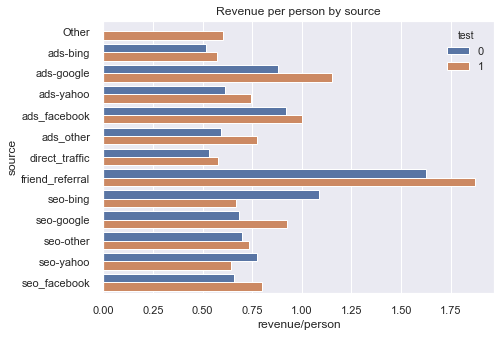

In [24]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(y='source', x='revenue/person', hue='test', data = data_source)
plt.title('Revenue per person by source')
plt.show()


#### New pricing model brings in more revenue per person from friend referral and google ads


### Revenue per person by 'operative system'

In [25]:
data_os = data.groupby(['operative_system', 'test']).apply(get_revenue).reset_index()
data_os.rename(columns={0: 'revenue/person'}, inplace=True)

In [26]:
data_os.head()

operative_system  test  revenue/person
0            Other     0        0.530805
1            Other     1        0.458549
2          android     0        0.625111
3          android     1        0.754149
4              iOS     0        0.914404

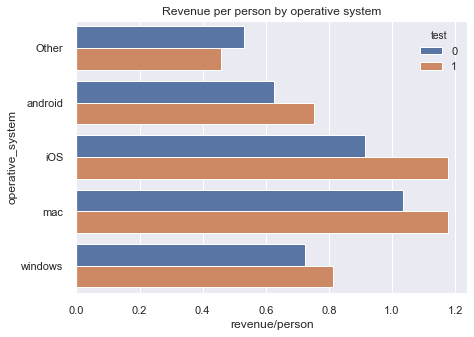

In [27]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(y='operative_system', x='revenue/person', hue='test', data= data_os)
plt.title('Revenue per person by operative system')
plt.show()

#### New pricing model brings in more revenue per person from users of iOS and mac

### Revenue per person by 'device'

In [28]:
data_device = data.groupby(['device', 'test']).apply(get_revenue).reset_index()
data_device.rename(columns={0: 'revenue/person'}, inplace=True)

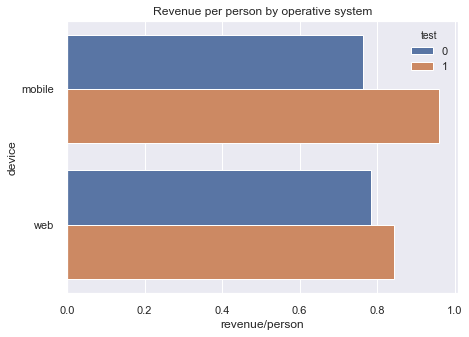

In [29]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(y='device', x='revenue/person', hue='test', data= data_device)
plt.title('Revenue per person by operative system')
plt.show()

#### New pricing model brings in more revenue per person from mobile users

# Question 3

#### We'll use power analysis to determine how many users we need to be in each treatment and control group get statistically significant results.


In [30]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
     # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [31]:
#Probability of success for the control group:
conversion_rate_control = (len(data[(data["test"] == 0) & (data["converted"] == 1)]) / len(data[data["test"] == 0]))
print(conversion_rate_control)

0.019765492220270218


In [32]:
#Applying min_sample_size function to the probability of success for the control group:
min_user=min_sample_size(bcr=conversion_rate_control, mde=0.2, power=0.8, sig_level=0.05)
print(min_user)

41.37211972766331


#### This means we need to run the test long enough so we'll have at least 41 users in each control and treatment group to have an 80% chance of identifying a 20% change in conversion rate.